# LAB1 - image information

**Objectives:**

* Get used to the Notebook development environment and to basic image manipulation using Python.
* Apply pixel level processing to an image
* Illustrate entropy and compression

## Image histogram

Using the [numpy library](https://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.histogram.html#), compute and plot the **histogram** and the **normalized histogram** of the example cameraman image given below.

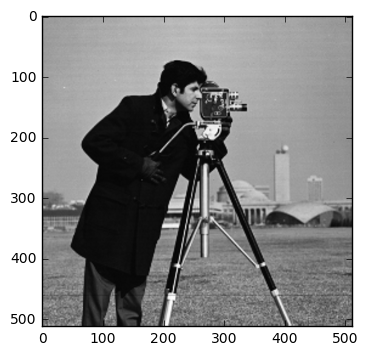

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.data import camera

# Test image provided by the skimage library
im = camera()

plt.figure()
plt.imshow(im, cmap=plt.cm.gray, vmin=0, vmax=255) # Use the "grayscale" colormap to display the image correctly
plt.show()

In [ ]:

# -- Your code here -- #


Can you use the histogram to answer the following questions ?

1. What is the average gray value of the cameraman ?
1. What is the average gray value of the sky ?
1. Is there more 'cameraman' pixels than 'sky' pixels ?

Compute and plot the **cumulated histogram**.

In [ ]:

# -- Your code here -- #


## Look-up table

Numpy arrays indexing ([see reference here](http://docs.scipy.org/doc/numpy/user/basics.indexing.html)) is a very powerful tool, but can be a bit counter-intuitive at first. We will use it to quickly create and use look-up tables to transform an image.

Given the short example below :

In [18]:
# m is a 3x3 pixels matrix of integers with 4 possible values (in [0,3])
m = np.array([[1,0,2],[2,1,3],[3,3,1]])

# look-up table is a vector of size 4 mapping the new value for the pixels of m
lut = np.array([3,2,1,0]) # maps 0 -> 3, 1 -> 2, 2 -> 1, 3 -> 0

# to map data use numpy vector indexing
new_m = lut[m] # This will create a new array with the same size as m

print('Original data is \n'+str(m))
print('Transformed data is \n'+str(new_m))

Original data is 
[[1 0 2]
 [2 1 3]
 [3 3 1]]
Transformed data is 
[[2 3 1]
 [1 2 0]
 [0 0 2]]


The example above illustrate how to map all the value present in an array $m$ onto the new values given by a look-up table $lut$ which is a simple 1D vector.

Starting from this example, create LUTs and apply them to the cameraman image:
1. For inverting an image
1. To keep only graylevel such that $g \ge t$
1. To equalize the cameraman graylevel distribution

In [ ]:

# -- Your code here -- #


## Image entropy
1. Compute the image entropy of the cameraman image. The image entropy is given by $e = - \sum_{g=0}^N p(g) \log(p(g))$ where $p(g)$ is the probability that a pixel has the grayscale value g, and N is the number of possible grayscale values.
1. Compute de [coocurence matrix](https://en.wikipedia.org/wiki/Co-occurrence_matrix) for a given displacement $(\Delta x,\Delta y)$
1. What is the entropy of the coocurence matrix ?
1. How does this entropy evolve if we increase displacement ?
1. What is the entropy of a shuffled version of the cameraman ?

In [ ]:

# -- Your code here -- #


## Image compression

1. Decompose an image by recursively subsamplimg its dimensions and computing the remainders allowing the selection the level of recursion (see the example below)
1. Compute how the image entropy evolves with regards to the level of decomposition
1. Rebuild the original image from the pyramid (allowing the selection the level of recursion)

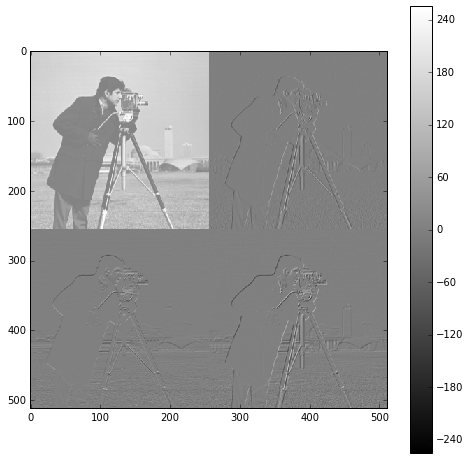

In [10]:
# example of recursive function that subsamble the image
def split(im):
    if im.shape[0] > 256: 
        a = im[0:-1:2,0:-1:2]
        b = im[0:-1:2,1::2]-a
        c = im[1::2,0:-1:2]-a
        d = im[1::2,1::2]-a
        R = np.vstack((np.hstack((split(a),b)),np.hstack((c,d))))
    else:
        R = im
    return R

im = camera().astype(np.float)
s = split(im)

fig = plt.figure(figsize=[8,8])
plt.imshow(s,interpolation='nearest',cmap=cm.gray,vmin=-255, vmax=255)
plt.colorbar()

plt.show()

In [ ]:

# -- Your code here -- #
